In [1]:
import pandas as pd
import numpy as np
import geopandas as gpd
%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
pgrounds = pd.read_csv("data/playgrounds.csv")
pgrounds.head()

,id,name,type,maintenance_responsibility,park,street,image,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude
0,731501774,Able Long Playground,NaN,Parks - Western,Able Long Park,COAST AVE,https://tools.wprdc.org/images/pittsburgh/play...,Beechview,4,19,42003192000,5,19,6,4-28,40.408365,-80.028445
1,1461276747,Albert Graham Playground,NaN,Parks - Schenley,Albert Turk Graham Park,FORESIDE PL,https://tools.wprdc.org/images/pittsburgh/play...,Crawford-Roberts,6,3,42003030500,3,3,2,2-1,40.440519,-79.984137
2,1860709784,Alpine Playground,NaN,Parks - Northern,Alpine Gardens Park,ALPINE AVE,https://tools.wprdc.org/images/pittsburgh/play...,Central Northside,6,25,42003250300,1,25,1,1-21,40.457707,-80.012952
3,1770671485,Alton Playground,NaN,Parks - Western,Alton Park,ANDICK WAY,https://tools.wprdc.org/images/pittsburgh/play...,Beechview,4,19,42003191600,5,19,6,4-28,40.414137,-80.021605
4,18942817,Ammon Playground,NaN,Parks - Schenley,Ammon Park,MEMORY LN,https://tools.wprdc.org/images/pittsburgh/play...,Bedford Dwellings,6,5,42003050900,3,5,2,2-5,40.449037,-79.978064


### According to the code block below, Squirrel Hill South has the most number of playgrounds with a total number of 8. 

In [4]:
most_playgrounds = pgrounds[['neighborhood']].mode()
playground_count = pgrounds[['neighborhood']].value_counts()
# add bar graph 
print('The neighborhood with the most number of playgrounds is ' + most_playgrounds.to_string(index=False, header=False))
print('The total number of playgrounds is ' + str(playground_count[0]))

The neighborhood with the most number of playgrounds is Squirrel Hill South
The total number of playgrounds is 8


### When looking at the total number of playgrounds per neighborhood, it is especially apparent that Squirrel Hill South has a signficant lead.
#### (Neighborhoods with < 2 neighborhoods discarded from plot for clarity) 

Text(0.5, 0, 'Total Number of Playgrounds')

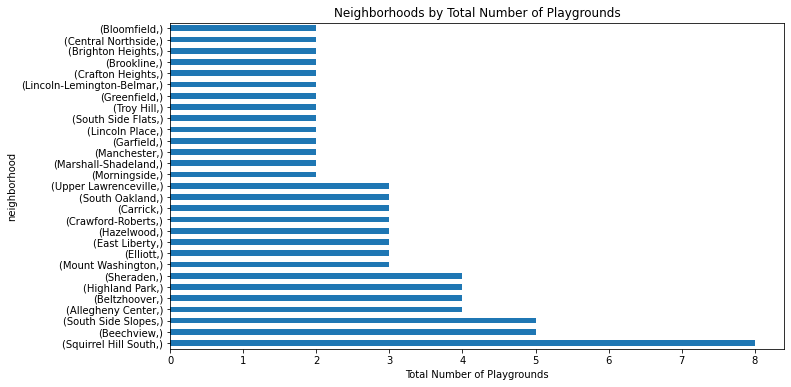

In [14]:
playground_count[playground_count > 1].plot(kind='barh', figsize=(11,6))
plt.title("Neighborhoods by Total Number of Playgrounds")
plt.xlabel("Total Number of Playgrounds")

### Now we know the answer, as to what the best Pittsburgh, PA neighborhood is in terms of playgrounds; but how can this finding be further emphasized? We believe that a geographic representation is most effective.

In [45]:
pgrounds_geo = gpd.GeoDataFrame(pgrounds, geometry=gpd.points_from_xy(pgrounds.longitude, pgrounds.latitude))

/Users/joel/miniforge3/envs/jupy/lib/python3.10/site-packages/geopandas/array.py:275: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  return GeometryArray(vectorized.points_from_xy(x, y, z), crs=crs)


In [16]:
pittsburgh = gpd.read_file('data/Neighborhoods_.shp') # loading in the shaoe file

Text(0.5, 1.0, 'Pittsburgh Playgrounds')

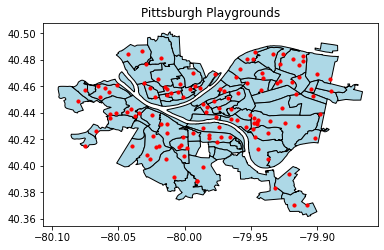

In [47]:
axis = pittsburgh.plot(color='lightblue', edgecolor='black')
pgrounds_geo.plot(ax=axis, color='red', figsize=(20,10), markersize=10)
plt.title('Pittsburgh Playgrounds')